In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load data and split it into train and test set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# get the image shape
print("x train : {} , y train : {}".format(x_train.shape, y_train.shape))
print("x test : {} , y test : {}".format(x_test.shape, y_test.shape))


x train : (60000, 28, 28) , y train : (60000,)
x test : (10000, 28, 28) , y test : (10000,)


In [4]:
# Reshape the data to fit the model
x_train = x_train.reshape(60000, 28,28, 1) # 1 is gray scales
x_test = x_test.reshape(10000,28,28,1)
print('success resize !')

success resize !


In [5]:
# one hot Encoding: 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

print('y train one hot: ',y_train_one_hot[0])

y train one hot:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
# Build the CNN model
model = Sequential()
# add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
hist = model.fit(x_train, y_train_one_hot, validation_data=(x_test, y_test_one_hot), epochs=50)
model.save('mnist.h5')
print('save model succesfully')

Epoch 1/50
1875/1875 [==============================] - 163s 87ms/step - loss: 0.2476 - accuracy: 0.9513 - val_loss: 0.0978 - val_accuracy: 0.9738
Epoch 2/50
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0671 - accuracy: 0.9792 - val_loss: 0.1050 - val_accuracy: 0.9711
Epoch 3/50
1875/1875 [==============================] - 147s 78ms/step - loss: 0.0471 - accuracy: 0.9853 - val_loss: 0.0896 - val_accuracy: 0.9788
Epoch 4/50
1875/1875 [==============================] - 141s 75ms/step - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.1094 - val_accuracy: 0.9740
Epoch 5/50
1875/1875 [==============================] - 145s 78ms/step - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.0847 - val_accuracy: 0.9803
Epoch 6/50
1875/1875 [==============================] - 289s 154ms/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 0.1237 - val_accuracy: 0.9794
Epoch 7/50
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 

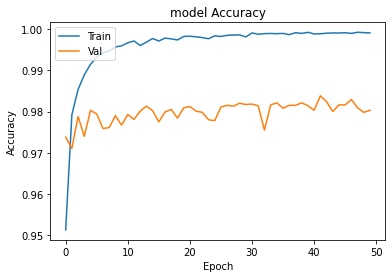

In [23]:
# visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [26]:
# load model
from keras.models import load_model
model = load_model('/Users/sutimarpengpinij/Desktop/204491_Independence/handwritten-recognize-491/code/mnist.h5')

In [29]:
# show prediction as probabilites for the first 4 image in the test set
predicts = model.predict(x_test[:9])


In [31]:
# print prediction as number label for the first image
print(np.argmax(predicts, axis=1))
# print actual labels
print(y_test[:9])

[7 2 1 0 4 1 4 9 5]
[7 2 1 0 4 1 4 9 5]


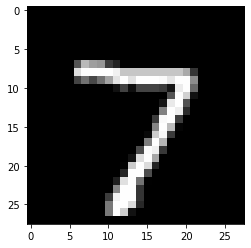

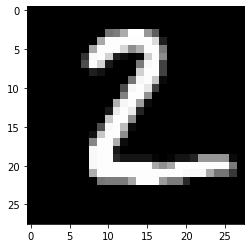

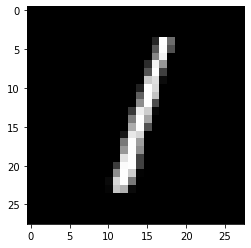

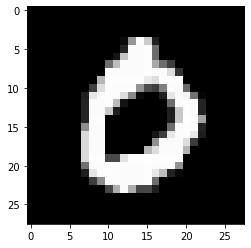

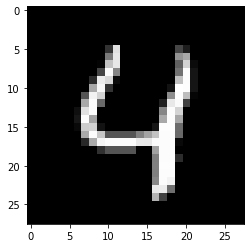

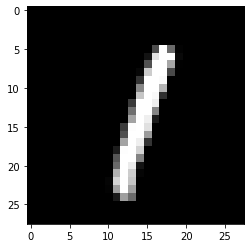

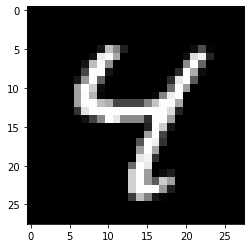

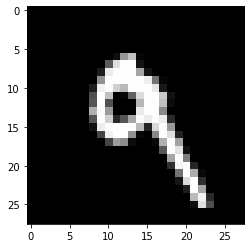

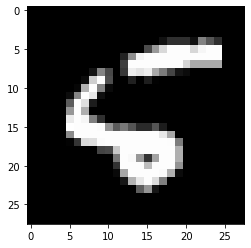

In [33]:
# show image
for i in range(0,9):
    img = x_test[i]
    img = np.array(img, dtype='float')
    pixels = img.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()